In [1]:
import pandas as pd
import seaborn as sns

# Read The DataSet

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.shape

(10000, 14)

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Distinguish The Feature And Target Set

In [15]:
# input data/ Features Set
x = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',	'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

# output data/ Target Set
y = df['Exited']

In [17]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


<Axes: xlabel='Exited', ylabel='count'>

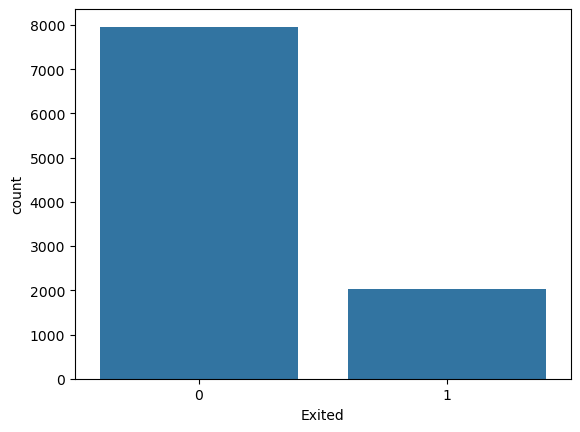

In [19]:
sns.countplot(x=y)

In [21]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Normalize The Train And Test Data

In [24]:
# Normalize The Train And Test Data
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [28]:
x_scaled = scaler.fit_transform(x)

In [30]:
x_scaled

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

# Cross Validation - Train Test Data

In [33]:
# Cross Validation - Train Test Data
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [37]:
x.shape

(10000, 8)

In [39]:
x_test.shape

(2500, 8)

In [41]:
x_train.shape

(7500, 8)

# Initialize and build the model

In [44]:
# Initialize and build the model
from sklearn.neural_network import MLPClassifier

In [46]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100), random_state=0, max_iter=100, activation='relu')

In [48]:
ann.fit(x_train, y_train)

C:\Users\Shubham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [49]:
y_pred = ann.predict(x_test)

In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [52]:
y_test.value_counts()

Exited
0    1991
1     509
Name: count, dtype: int64

# Print Accuracy Score And Confusion Matrics

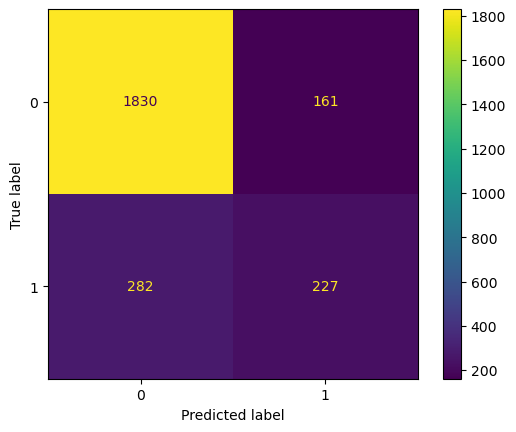

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [55]:
accuracy_score(y_test, y_pred)

0.8228

# imbalenced Classifier is this

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.59      0.45      0.51       509

    accuracy                           0.82      2500
   macro avg       0.73      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500



# to balace the dataset

In [59]:
!pip install imbalanced-learn

In [60]:
from imblearn.over_sampling import RandomOverSampler

In [61]:
ros = RandomOverSampler(random_state = 0)

In [62]:
x_res, y_res = ros.fit_resample(x,y)

In [63]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

# This above data is balanced using Over Sampler techniques

In [65]:
# Normalize
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
x_scaled = scaler.fit_transform(x_res)

In [68]:
x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 ,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [69]:
# Cross Validation - Train Test Data
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res, random_state=0, test_size=0.25)

In [71]:
x_res.shape

(15926, 8)

In [72]:
x_test.shape

(3982, 8)

In [73]:
x_train.shape

(11944, 8)

In [74]:
# Initialize and build the model
from sklearn.neural_network import MLPClassifier

In [75]:
ann = MLPClassifier(hidden_layer_sizes=(100,100,100), random_state=0, max_iter=100, activation='relu')

In [76]:
ann.fit(x_train, y_train)

C:\Users\Shubham\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [77]:
y_pred = ann.predict(x_test)

In [78]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [80]:
y_test.value_counts()

Exited
1    2001
0    1981
Name: count, dtype: int64

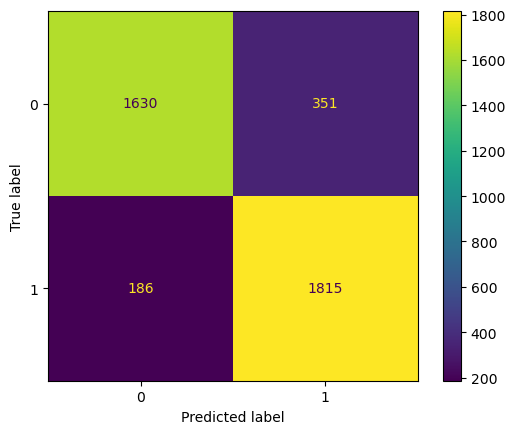

In [81]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [82]:
accuracy_score(y_test, y_pred)

0.865143144148669

# balenced Classifier is this

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982

